In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Data Set: FD001
Train trjectories: 100
Test trajectories: 100
Conditions: ONE (Sea Level)
Fault Modes: ONE (HPC Degradation)

Data Set: FD002
Train trjectories: 260
Test trajectories: 259
Conditions: SIX 
Fault Modes: ONE (HPC Degradation)

Data Set: FD003
Train trjectories: 100
Test trajectories: 100
Conditions: ONE (Sea Level)
Fault Modes: TWO (HPC Degradation, Fan Degradation)

Data Set: FD004
Train trjectories: 248
Test trajectories: 249
Conditions: SIX 
Fault Modes: TWO (HPC Degradation, Fan Degradation)

The initial observation reveals that the dataset contains 26 columns, including engine ID, measurement timestamp, three operational settings, and 21 sensor measurements. 
Additionally, sensor measurements can be labeled according to the methodology outlined in the relevant scientific article.

Notably, there are no missing values (NAs) in any column, meaning all sensor and operational data is complete, and imputation is unnecessary. 
Each group, engine id and time has one observation so we have only one fault for each unique engine in the dataset.

In [59]:
columns = ["engine_id", "time"] + ["operational_setting" + str(i) for i in range(1,4)] + [ 
"(Fan inlet temperature) (◦R)",
"(LPC outlet temperature) (◦R)",
"(HPC outlet temperature) (◦R)",
"(LPT outlet temperature) (◦R)",
"(Fan inlet Pressure) (psia)",
"(bypass-duct pressure) (psia)",
"(HPC outlet pressure) (psia)",
"(Physical fan speed) (rpm)",
"(Physical core speed) (rpm)",
"(Engine pressure ratio(P50/P2)",
"(HPC outlet Static pressure) (psia)",
"(Ratio of fuel flow to Ps30) (pps/psia)",
"(Corrected fan speed) (rpm)",
"(Corrected core speed) (rpm)",
"(Bypass Ratio) ",
"(Burner fuel-air ratio)",
"(Bleed Enthalpy)",
"(Required fan speed)",
"(Required fan conversion speed)",
"(High-pressure turbines Cool air flow)",
"(Low-pressure turbines Cool air flow)" ] + ["FD00"]

train_FD001 = pd.read_csv("CMAPSSData/train_FD001.txt", sep = " ", header = None).assign(FD00 = 1)
train_FD002 = pd.read_csv("CMAPSSData/train_FD002.txt", sep = " ", header = None).assign(FD00 = 2)
train_FD003 = pd.read_csv("CMAPSSData/train_FD003.txt", sep = " ", header = None).assign(FD00 = 3)
train_FD004 = pd.read_csv("CMAPSSData/train_FD004.txt", sep = " ", header = None).assign(FD00 = 4)
full_train_ds = pd.concat([train_FD001, train_FD002, train_FD003, train_FD004], axis = 0).dropna(axis = 1)
full_train_ds.columns = columns

full_train_ds['rul'] = full_train_ds.groupby('engine_id')['time'].transform('max') - full_train_ds['time']
full_train_ds

,engine_id,time,operational_setting1,operational_setting2,operational_setting3,(Fan inlet temperature) (◦R),(LPC outlet temperature) (◦R),(HPC outlet temperature) (◦R),(LPT outlet temperature) (◦R),(Fan inlet Pressure) (psia),...,(Corrected core speed) (rpm),(Bypass Ratio),(Burner fuel-air ratio),(Bleed Enthalpy),(Required fan speed),(Required fan conversion speed),(High-pressure turbines Cool air flow),(Low-pressure turbines Cool air flow),FD00,rul
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,1,320
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,1,319
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,1,318
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,1,317
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,1,316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61244,249,251,9.9998,0.2500,100.0,489.05,605.33,1516.36,1315.28,10.52,...,8185.69,8.4541,0.03,372,2319,100.0,29.11,17.5234,4,4
61245,249,252,0.0028,0.0015,100.0,518.67,643.42,1598.92,1426.77,14.62,...,8185.47,8.2221,0.03,396,2388,100.0,39.38,23.7151,4,3
61246,249,253,0.0029,0.0000,100.0,518.67,643.68,1607.72,1430.56,14.62,...,8193.94,8.2525,0.03,395,2388,100.0,39.78,23.8270,4,2
61247,249,254,35.0046,0.8400,100.0,449.44,555.77,1381.29,1148.18,5.48,...,8125.64,9.0515,0.02,337,2223,100.0,15.26,9.0774,4,1


In [60]:
full_train_ds.groupby("FD00").nunique().iloc[:,:10]

,engine_id,time,operational_setting1,operational_setting2,operational_setting3,(Fan inlet temperature) (◦R),(LPC outlet temperature) (◦R),(HPC outlet temperature) (◦R),(LPT outlet temperature) (◦R),(Fan inlet Pressure) (psia)
FD00,,,,,,,,,,
1,100,362,158,13,1,1,310,3012,4051,1
2,260,378,536,105,2,6,1590,12305,15411,6
3,100,525,160,14,1,1,334,3358,4383,1
4,249,543,536,105,2,6,1704,13558,17353,6


In [61]:
full_train_ds.groupby("FD00").nunique().iloc[:,10:]

,(bypass-duct pressure) (psia),(HPC outlet pressure) (psia),(Physical fan speed) (rpm),(Physical core speed) (rpm),(Engine pressure ratio(P50/P2),(HPC outlet Static pressure) (psia),(Ratio of fuel flow to Ps30) (pps/psia),(Corrected fan speed) (rpm),(Corrected core speed) (rpm),(Bypass Ratio),(Burner fuel-air ratio),(Bleed Enthalpy),(Required fan speed),(Required fan conversion speed),(High-pressure turbines Cool air flow),(Low-pressure turbines Cool air flow),rul
FD00,,,,,,,,,,,,,,,,,
1,2,513,53,6403,1,159,427,56,6078,1918,1,13,1,1,120,4745,525
2,14,2067,897,22434,9,681,1672,514,14905,8464,2,53,6,2,510,17837,543
3,17,1854,161,7114,4,170,1772,163,6320,3122,1,12,1,1,165,6440,525
4,46,5926,1038,25297,21,737,5627,483,15938,11915,2,54,6,2,652,21574,543


In [62]:
full_train_ds.groupby(["FD00", "engine_id", "time"]).count().drop_duplicates()

,,,operational_setting1,operational_setting2,operational_setting3,(Fan inlet temperature) (◦R),(LPC outlet temperature) (◦R),(HPC outlet temperature) (◦R),(LPT outlet temperature) (◦R),(Fan inlet Pressure) (psia),(bypass-duct pressure) (psia),(HPC outlet pressure) (psia),...,(Corrected fan speed) (rpm),(Corrected core speed) (rpm),(Bypass Ratio),(Burner fuel-air ratio),(Bleed Enthalpy),(Required fan speed),(Required fan conversion speed),(High-pressure turbines Cool air flow),(Low-pressure turbines Cool air flow),rul
FD00,engine_id,time,,,,,,,,,,,,,,,,,,,,,
1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


Based on the README information, we understand the following group structure (noted in column FD00 for clarity):

- Groups 1 and 3 each have a single operational condition, whereas Groups 2 and 4 include six distinct operational conditions. The six conditions are available by taking the fan measurements "(Fan inlet temperature) (◦R)", "(Fan inlet Pressure) (psia)", "(Required fan speed)". We can see that one of the conditions of these three columns in the 2nd and 4th group is the same as the conditions in the 1st and 3rd group. (Fan inlet temperature) (◦R) = 518.67,	(Fan inlet Pressure) (psia) = 14.62, (Required fan speed) = 238. 
- In terms of fault modes, Groups 1 and 2 have one fault mode, while Groups 3 and 4 exhibit two fault modes.
- All groups share a common fault mode: HPC (High Pressure Compressor) degradation. Additionally, Groups 3 and 4 can also experience Fan Degradation.

When examining the combined groups, conditions, and fault modes, we observe that certain variables, which may appear constant when analyzing only Group 1, actually vary across groups and could significantly influence prediction accuracy. This insight is essential for model development, as it highlights the importance of accounting for all group variations. Building a model based solely on one group could lead to information loss and suboptimal predictive performance.

In [63]:
full_train_ds[["FD00", "(Fan inlet temperature) (◦R)", "(Fan inlet Pressure) (psia)", "(Required fan speed)"]].drop_duplicates().reset_index(drop=True)

,FD00,(Fan inlet temperature) (◦R),(Fan inlet Pressure) (psia),(Required fan speed)
0,1,518.67,14.62,2388
1,2,449.44,5.48,2223
2,2,445.00,3.91,2212
3,2,462.54,7.05,1915
4,2,491.19,9.35,2324
5,2,518.67,14.62,2388
6,2,489.05,10.52,2319
7,3,518.67,14.62,2388
8,4,445.00,3.91,2212
9,4,491.19,9.35,2324


What is also worth noting is that RUL by its definition is the time to default. 


In our dataset we have column timestamp which could be included as a seperate feature but from the explorations we see that it should not be included.
First we see that most of the engines are more probable to degrade by its 200th timestamp. This means that RUL is more probable to be equal to 1 if engine timestamp is close to 200, engines with time more than 400 are outliers. We can see that group 3 and 4 have higher time of fault than group 1 and 2. This initial observation shows that despite groups 3 and 4 having two possible reasons for fault, their time without fault is longer. This is contadictory to the intuition. From the research of articles we find that this might be caused by each engine starting with different initial wear and manufacturing variation. This means that engines could have been used before without measurements available in the dataset.

If we look at RUL we can see that median in groups 1 and 3 are much higher. Despite different fan conditions, the RUL median value is stable within the group.

<Axes: >

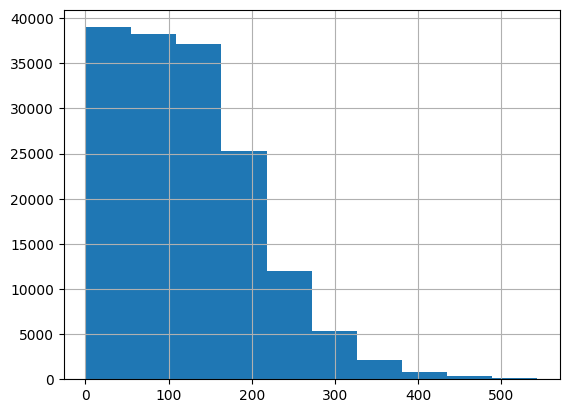

In [64]:
full_train_ds.time.hist()

In [65]:
full_train_ds.groupby(["FD00"])["time"].median()

FD00
1    104.0
2    104.0
3    124.0
4    123.0
Name: time, dtype: float64

In [ ]:
full_train_ds.groupby(["FD00"])["rul"].median()

FD00
1    186.0
2    163.0
3    172.0
4    151.0
Name: rul, dtype: float64

In [72]:
full_train_ds.groupby(["FD00", "(Fan inlet temperature) (◦R)"])["rul"].median()

FD00  (Fan inlet temperature) (◦R)
1     518.67                          186.0
2     445.00                          164.0
      449.44                          162.0
      462.54                          162.0
      489.05                          161.0
      491.19                          163.5
      518.67                          163.0
3     518.67                          172.0
4     445.00                          151.0
      449.44                          149.0
      462.54                          151.0
      489.05                          152.0
      491.19                          151.0
      518.67                          149.0
Name: rul, dtype: float64

In [69]:
full_train_ds[['(HPC outlet temperature) (◦R)', '(HPC outlet pressure) (psia)', '(HPC outlet Static pressure) (psia)', 'rul']].corr()

,(HPC outlet temperature) (◦R),(HPC outlet pressure) (psia),(HPC outlet Static pressure) (psia),rul
(HPC outlet temperature) (◦R),1.000000,0.958539,0.973479,0.042124
(HPC outlet pressure) (psia),0.958539,1.000000,0.878567,0.068604
(HPC outlet Static pressure) (psia),0.973479,0.878567,1.000000,0.019554
rul,0.042124,0.068604,0.019554,1.000000


In [70]:
full_train_ds[['operational_setting1', 'operational_setting2', 'operational_setting3',  'rul']].corr()

,operational_setting1,operational_setting2,operational_setting3,rul
operational_setting1,1.000000,0.967487,-0.163079,-0.065655
operational_setting2,0.967487,1.000000,-0.197923,-0.070018
operational_setting3,-0.163079,-0.197923,1.000000,0.023442
rul,-0.065655,-0.070018,0.023442,1.000000


Consider using just two first datasets at the beginning. This gives more information about the singel failure mode. Multiple fault modes make it a more complex problem, because we dont know what caused the failure.